### Faza 4

- zrobienie nowych kopii danych 
- zmienienie nazw kolumn
- usuniecie niepotrzebnych danych

In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [7]:
df = pd.read_csv('../data/wine_cleared.csv')

#### Drop tables

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
corr = df.corr()["quality"]
print(abs(corr).sort_values(ascending=False))

quality                 1.000000
alcohol                 0.492461
sulphates               0.389070
volatile acidity        0.354023
citric acid             0.246467
total sulfur dioxide    0.225417
density                 0.165517
fixed acidity           0.149053
chlorides               0.109996
pH                      0.092581
free sulfur dioxide     0.052188
residual sugar          0.051648
Name: quality, dtype: float64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424 entries, 0 to 1423
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1424 non-null   float64
 1   volatile acidity      1424 non-null   float64
 2   citric acid           1424 non-null   float64
 3   residual sugar        1424 non-null   float64
 4   chlorides             1424 non-null   float64
 5   free sulfur dioxide   1424 non-null   float64
 6   total sulfur dioxide  1424 non-null   float64
 7   density               1424 non-null   float64
 8   pH                    1424 non-null   float64
 9   sulphates             1424 non-null   float64
 10  alcohol               1424 non-null   float64
 11  quality               1424 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 133.6 KB


In [17]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000,1424.000000
mean,8.308146,0.522897,0.264115,2.385990,0.081270,14.952949,42.658708,0.996709,3.316721,0.640864,10.422776,5.659410
std,1.644533,0.168882,0.191162,0.859421,0.020358,9.167369,27.831363,0.001697,0.140946,0.126790,1.009241,0.778223
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,35.000000,0.996700,3.320000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,57.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.222000,45.000000,135.000000,1.002100,3.750000,1.110000,13.500000,8.000000


<Axes: >

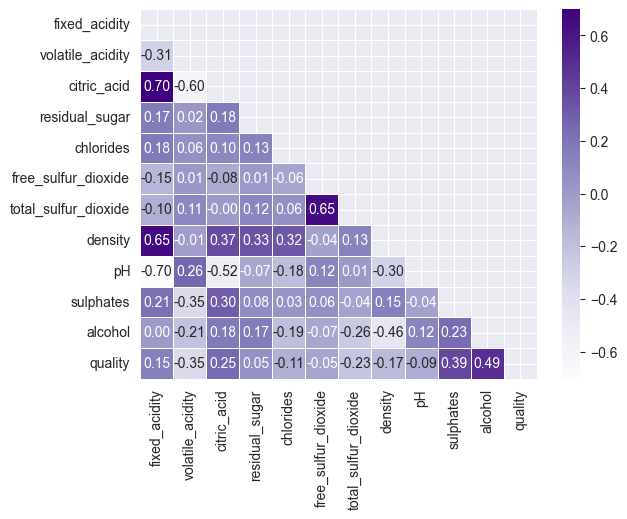

In [40]:
sn.heatmap(data= df.corr(), cmap="Purples",annot=True, fmt=".2f",linewidths=0.5,mask=np.triu(df.corr()))

In [21]:
df.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

In [22]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


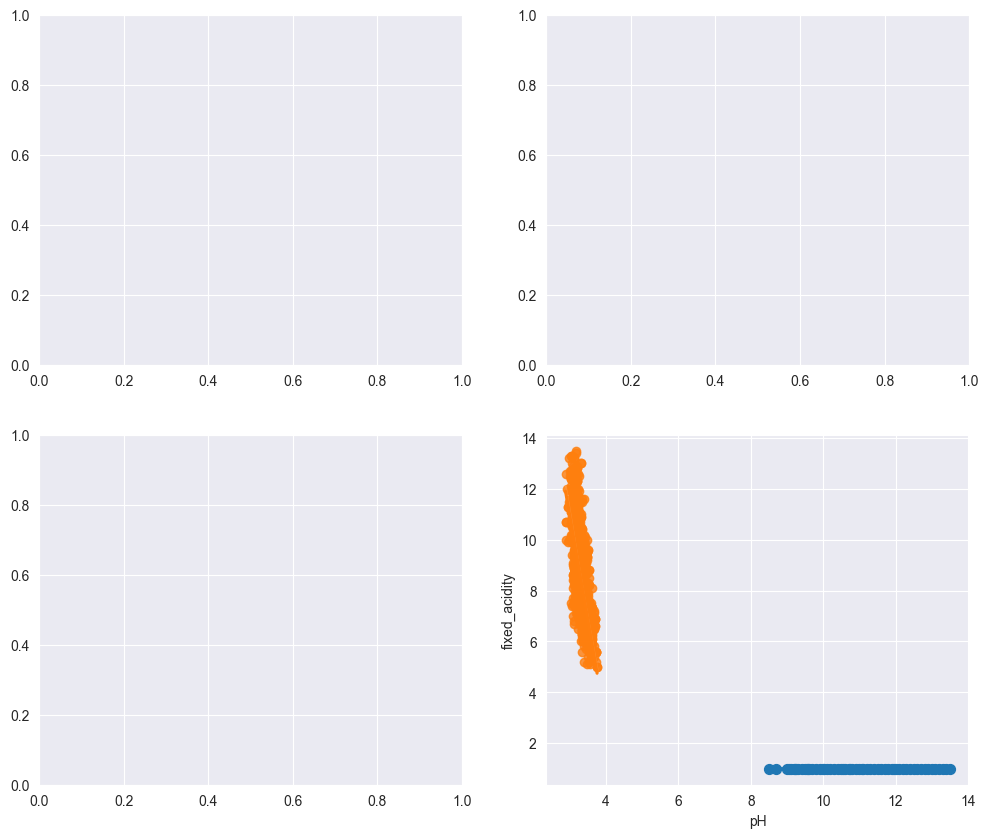

In [42]:
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes = axes.flatten()
axes[0] = sn.regplot(data=df, x="alcohol", y="density", x_estimator=np.mean)

axes[1] = sn.regplot(data=df, x='pH', y="fixed_acidity")

### Podzial danych
Dane zostana podzielone w proporcjach 7:2:1 na zbiory treningowy, walidacyjny, testowy

In [48]:
from sklearn.model_selection import train_test_split

y = df.score
x = df.drop(columns='score')

#zbior testowy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


print(x_train.count())
print(x_test.count())

age                                700
gaming_hours                       700
sleep_hours                        700
stress_level                       700
focus_level                        700
gender_male                        700
occupation_working professional    700
gaming_time_Morning                700
gaming_time_Night                  700
game_type_Casual                   700
game_type_Puzzle                   700
game_type_Simulation               700
game_type_Sports                   700
game_type_Strategy                 700
dtype: int64
age                                300
gaming_hours                       300
sleep_hours                        300
stress_level                       300
focus_level                        300
gender_male                        300
occupation_working professional    300
gaming_time_Morning                300
gaming_time_Night                  300
game_type_Casual                   300
game_type_Puzzle                   300
game_type_Si

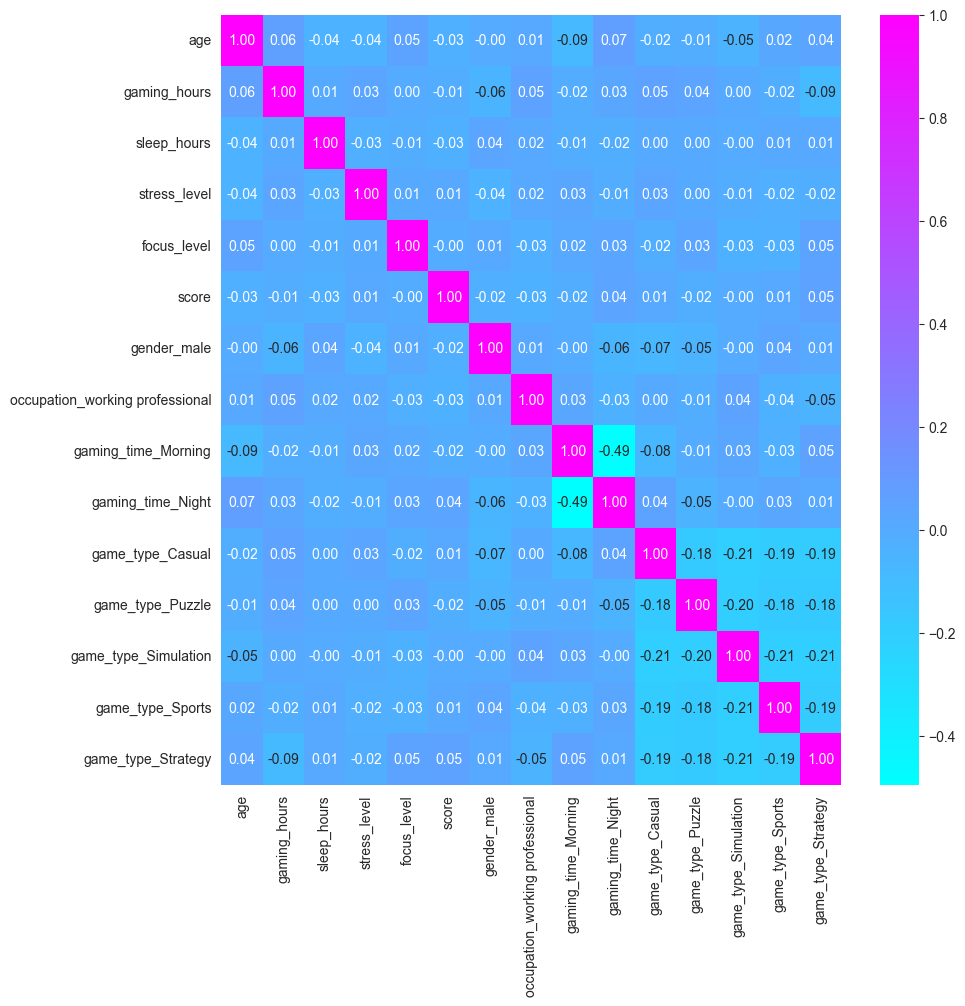

In [49]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sn.heatmap(data=df.corr(), annot=True, cmap="cool", fmt=".2f")

### Regresja linniowa

In [50]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
model = linear_model.LinearRegression()

In [52]:
print(x_train.shape)

(700, 14)


In [53]:
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [54]:
y_pred = model.predict(x_test)

In [55]:
print("Coefficents: ", model.coef_)
print("Intercept: %.2f" % model.intercept_)
print('Mean square error: %.2f' % mean_squared_error(y_test, y_pred))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("R^2 score %.3f" % r2_score(y_test, y_pred))


Coefficents:  [-0.12783536 -0.17650207 -0.34350581 -0.01509848 -0.15392644  0.20904289
 -0.82560714 -0.66413061  1.11524628  1.83853315  1.32814641  0.01514034
  1.3090124   2.45017063]
Intercept: 81.62
Mean square error: 140.85
MAE: 10.34
R^2 score -0.030


In [56]:
print(df.drop(columns="score").columns)

Index(['age', 'gaming_hours', 'sleep_hours', 'stress_level', 'focus_level',
       'gender_male', 'occupation_working professional', 'gaming_time_Morning',
       'gaming_time_Night', 'game_type_Casual', 'game_type_Puzzle',
       'game_type_Simulation', 'game_type_Sports', 'game_type_Strategy'],
      dtype='object')


<Axes: ylabel='score'>

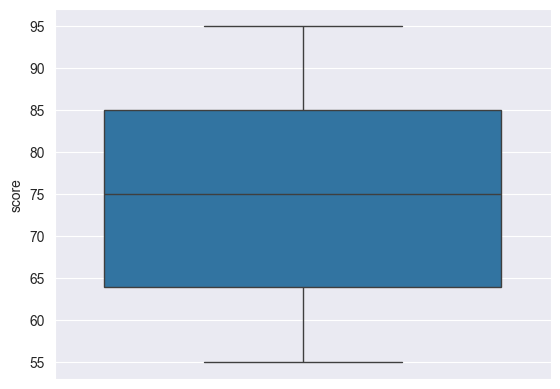

In [57]:
sn.boxplot(y_test)

<Axes: >

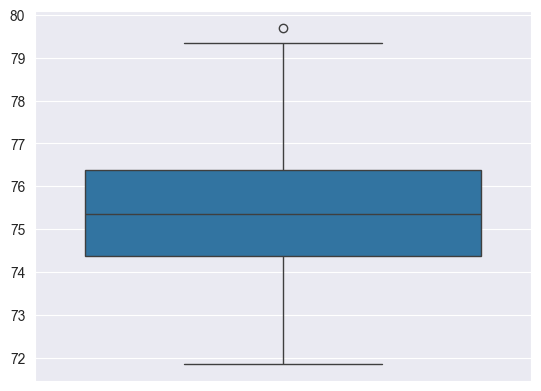

In [58]:
sn.boxplot(y_pred)

In [59]:
waga_df = pd.DataFrame({"Cecha: ": df.drop(columns="score").columns, 'Waga': model.coef_})
waga_df.sort_values(by='Waga', ascending=False)

,Cecha:,Waga
13,game_type_Strategy,2.450171
9,game_type_Casual,1.838533
10,game_type_Puzzle,1.328146
12,game_type_Sports,1.309012
8,gaming_time_Night,1.115246
5,gender_male,0.209043
11,game_type_Simulation,0.015140
3,stress_level,-0.015098
0,age,-0.127835
4,focus_level,-0.153926


In [60]:
df.corr()["score"].sort_values(ascending=False)

score                              1.000000
game_type_Strategy                 0.052472
gaming_time_Night                  0.037623
game_type_Casual                   0.014614
stress_level                       0.013398
game_type_Sports                   0.008963
game_type_Simulation              -0.003911
focus_level                       -0.004908
gaming_hours                      -0.012049
gaming_time_Morning               -0.015293
game_type_Puzzle                  -0.017448
gender_male                       -0.022629
age                               -0.028235
sleep_hours                       -0.030080
occupation_working professional   -0.033654
Name: score, dtype: float64

### Korelacja pokazala, że regresja linniowa dla tych danych jest kompletnie bez sensu

- Korelacja Score z innymi wartosciami to pokazuje ponieważ najwieksza wartosc |corr| wynosi 0.05
- Z braku silnej korelacji z cechami zaszlo zjawisko Regression toward the mean


## KNN REGRESSION

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
n = 1

min_mae = 95
min_rmse = 95
max_r2 = -10000
mae_score = {}
for n in range(1,100):
    pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor(n_neighbors=n))
])
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    mae = np.round(mean_absolute_error(y_test, y_pred),2)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
    r2 = np.round(r2_score(y_test, y_pred),2)
    mae_score[n] = mae
    if mae < min_mae:
        min_mae = mae
        # print(mae)
    if rmse < min_rmse:
        min_rmse = rmse
        # print(rmse)
    if r2 > max_r2:
        max_r2 = r2
        # print(r2)



print("MAE:", min_mae)
print("RMSE:", min_rmse)
print("R2:", max_r2)

MAE: 10.16
RMSE: 11.69
R2: -0.0


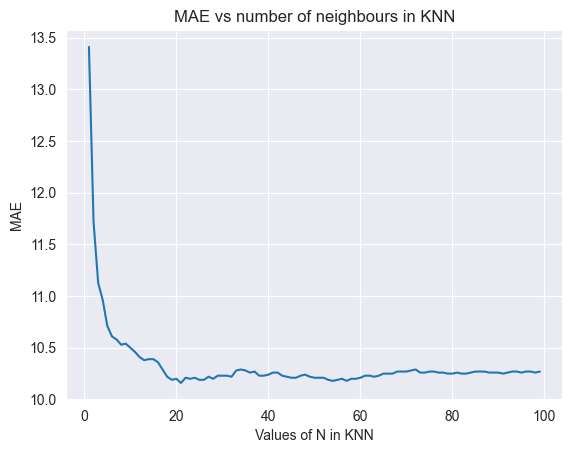

In [117]:
n_values = list(mae_score.keys())
mae_values = list(mae_score.values())
plt.plot(n_values, mae_values)
plt.xlabel("Values of N in KNN")
plt.ylabel("MAE")
plt.title("MAE vs number of neighbours in KNN")
plt.show()


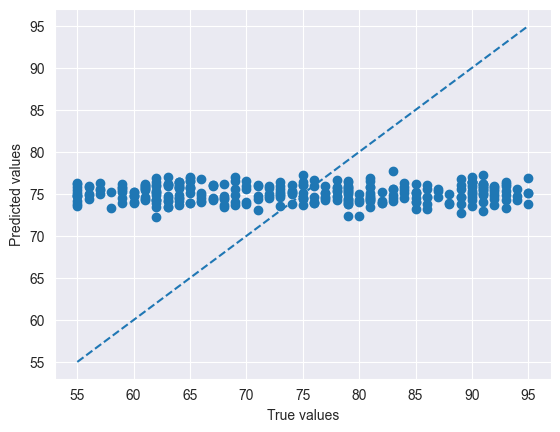

In [118]:
plt.scatter(y_test, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()


#### KNN nie pasuje do danych
- MAE na poziomie 25%


In [119]:
df.head()

,age,gaming_hours,sleep_hours,stress_level,focus_level,score,gender_male,occupation_working professional,gaming_time_Morning,gaming_time_Night,game_type_Casual,game_type_Puzzle,game_type_Simulation,game_type_Sports,game_type_Strategy
0,21,4.0,4.6,6,4,69,1,1,1,0,0,0,0,0,0
1,35,1.0,5.4,2,7,67,0,0,0,1,0,0,0,1,0
2,26,2.0,8.0,4,8,82,1,0,1,0,0,1,0,0,0
3,32,1.0,4.9,7,7,71,1,1,0,1,0,0,0,0,0
4,19,2.1,7.0,7,7,67,1,1,1,0,0,0,0,0,0


In [159]:
df_knn = ['game_type_Casual', 'game_type_Puzzle', "game_type_Simulation",'game_type_Sports','game_type_Strategy']
x_train_limited = x_train[df_knn]
x_test_limited = x_test[df_knn]

pipeline = Pipeline([
("scaler", StandardScaler()),
("knn", KNeighborsRegressor(n_neighbors=22))
])
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)
mae = np.round(mean_absolute_error(y_test, y_pred),2)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)).round(2)
r2 = np.round(r2_score(y_test, y_pred),2)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 10.21
RMSE: 11.86
R2: -0.03
